In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Набор данных взят с https://www.kaggle.com/aungpyaeap/fish-market
# Параметры нескольких популярных промысловых рыб
# length 1 = Body height
# length 2 = Total Length
# length 3 = Diagonal Length
fish_data = pd.read_csv("datasets/Fish.csv", delimiter=',')
print(fish_data)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [21]:
# Выделим параметры и метки классов
x_labels = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
y_label = 'Species'

data = fish_data[x_labels + [y_label]]
print(data)

     Weight  Length1  Length2  Length3   Height   Width Species
0     242.0     23.2     25.4     30.0  11.5200  4.0200   Bream
1     290.0     24.0     26.3     31.2  12.4800  4.3056   Bream
2     340.0     23.9     26.5     31.1  12.3778  4.6961   Bream
3     363.0     26.3     29.0     33.5  12.7300  4.4555   Bream
4     430.0     26.5     29.0     34.0  12.4440  5.1340   Bream
..      ...      ...      ...      ...      ...     ...     ...
154    12.2     11.5     12.2     13.4   2.0904  1.3936   Smelt
155    13.4     11.7     12.4     13.5   2.4300  1.2690   Smelt
156    12.2     12.1     13.0     13.8   2.2770  1.2558   Smelt
157    19.7     13.2     14.3     15.2   2.8728  2.0672   Smelt
158    19.9     13.8     15.0     16.2   2.9322  1.8792   Smelt

[159 rows x 7 columns]


In [22]:
# Определим размер валидационной и тестовой выборок
val_test_size = round(0.2*len(data))
print(val_test_size)

32


In [23]:
# Генерируем уникальный seed
my_code = "Mahrabi"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [24]:
# Создадим обучающую, валидационную и тестовую выборки
random_state = my_seed
train_val, test = train_test_split(data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [25]:
# Выделим обучающую, валидационную и тестовую выборки
train_x = train[x_labels]
train_y = np.array(train[y_label])

val_x = val[x_labels]
val_y = np.array(val[y_label])

test_x = test[x_labels]
test_y = np.array(test[y_label])

In [26]:
# Нормируем значения параметров
scaler_x = MinMaxScaler()
scaler_x.fit(train_x)
scaled_train_x = scaler_x.transform(train_x)

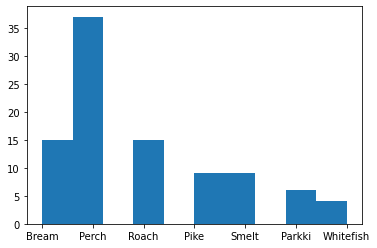

In [27]:
# Нарисуем график распределения классов
plt.hist(train_y)
plt.show()

In [28]:
# Создадим модель наивного Байесовского классификатора и обучим ее на ненормированных данных.
model1 = MultinomialNB()
model1.fit(train_x, train_y)

MultinomialNB()

In [29]:
# Проверим результат на валидационной выборке.
val_predicted = model1.predict(val_x)

f1_1 = f1_score(val_y, val_predicted, average = 'weighted')
print(f1_1)

0.31582125603864736


In [30]:
# Нормируем значения параметров
scaler_xv = MinMaxScaler()
scaler_xv.fit(val_x)
scaled_val_x = scaler_xv.transform(val_x)


In [31]:
# Нормируем значения параметров
scaler_xt = MinMaxScaler()
scaler_xt.fit(test_x)
scaled_test_x = scaler_xt.transform(test_x)

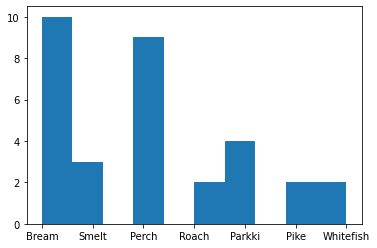

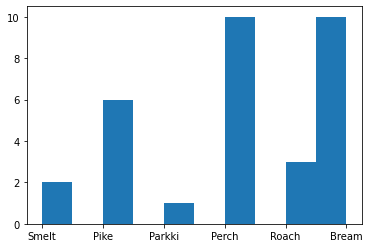

In [32]:
plt.hist(val_y)
plt.show()
plt.hist(test_y)
plt.show()

In [33]:
#Проведите обучение модели наивного Байесовского классификатора для нормированных данных
model2 = MultinomialNB()
model2.fit(scaled_train_x, train_y)

MultinomialNB()

In [34]:
# Проверим результат на валидационной выборке тестовой выборке.
val_predicted1 = model1.predict(val_x)
f1_1 = f1_score(val_y, val_predicted1, average = 'weighted')
print(f1_1)

test_predicted1 = model1.predict(test_x)
f1_2 = f1_score(test_y, test_predicted1, average = 'weighted')
print(f1_2)

val_predicted2 = model2.predict(val_x)
f1_3 = f1_score(val_y, val_predicted2, average = 'weighted')
print(f1_3)

val_predicted3 = model2.predict(scaled_val_x)
f1_4 = f1_score(val_y, val_predicted3, average = 'weighted')
print(f1_4)

test_predicted2 = model2.predict(test_x)
f1_5 = f1_score(test_y, test_predicted2, average = 'weighted')
print(f1_5)

test_predicted3 = model2.predict(scaled_test_x)
f1_6 = f1_score(test_y, test_predicted3, average = 'weighted')
print(f1_6)

0.31582125603864736
0.41725921137685845
0.056875
0.12347560975609756
0.046875
0.1488095238095238


In [35]:
# Создадим модель логистической регрессии и обучим ее на нормированных данных.
model1 = LogisticRegression()
model1.fit(scaled_train_x, train_y)

LogisticRegression()

In [36]:
# Проверим результат на валидационной выборке, тестовой выборке.
val_predicted1 = model1.predict(val_x)
val_predicted2 = model1.predict(scaled_val_x)

test_predicted1 = model1.predict(test_x)
test_predicted2 = model1.predict(scaled_test_x)


f1_1 = f1_score(val_y, val_predicted, average = 'weighted')
print(f1_1)
f1_2 = f1_score(val_y, val_predicted2, average = 'weighted')
print(f1_2)
# Проверим результат на тестовой выборке.
f1_3 = f1_score(test_y, test_predicted1, average = 'weighted')
print(f1_3)
f1_4 = f1_score(test_y, test_predicted2, average = 'weighted')
print(f1_4)

0.31582125603864736
0.5653409090909092
0.05921052631578947
0.559185606060606


In [ ]:
# Проведите обучение модели наивного Байесовского классификатора для нормированных данных, рассчитайте величину F1.
# Создайте модель логистической регрессии (LogisticRegression), обучите ее на нормированных данных, рассчитайте величину F1.
# Выберите наилучую модель по значению F1 на валидационной выборке. Рассчитайте ее F1 на тестовой выборке.